# OSMnx
OSMnx is a Python package to easily download, model, analyze, and visualize street networks and other geospatial features from OpenStreetMap.

overview articel: [link](https://geoffboeing.com/2016/11/osmnx-python-street-networks/)  
documentation: [link](https://osmnx.readthedocs.io/en/stable/index.html)


In [1]:
import osmnx as ox
import geopandas as gpd
 
place_name = "Elbe-Elster"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

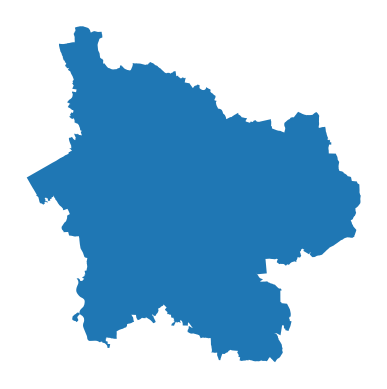

In [2]:
#Project a GeoDataFrame from its current CRS to another. If to_crs is None, it projects it to the CRS of an appropriate UTM zone given gdf’s bounds.
ax = ox.project_gdf(area).plot()
_ = ax.axis('off') 

Download and create graphs from OpenStreetMap data with __ox.graph_from_place__  
The osmnx.graph module uses filters to query the Overpass API: you can either specify a built-in network type or provide your own custom filter with Overpass QL.

In [8]:
#G = ox.graph_from_place(place_name, custom_filter='["power"~"line"]') #G as in Graph #"key"~"value"
G = ox.graph_from_place(place_name, network_type="drive")
#G = ox.graph_from_place(place_name, custom_filter='["railway"~"rail"]') #G as in Graph #"key"~"value"

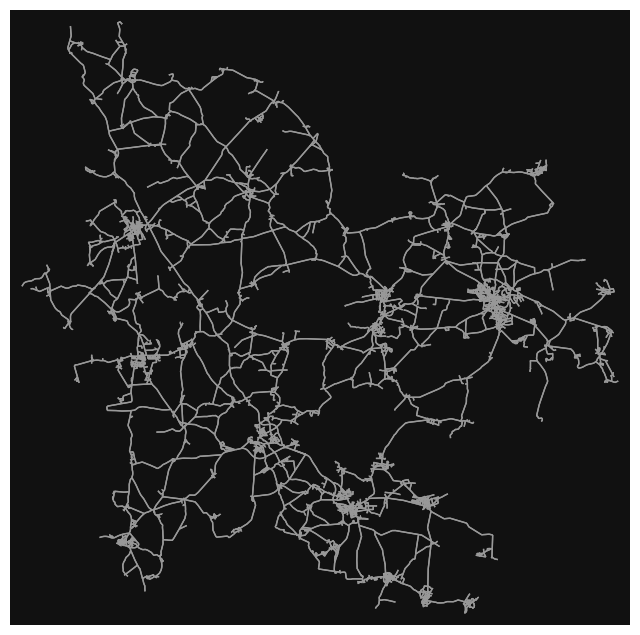

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [9]:
ox.plot_graph(G, node_size=0)

### add length

Vectorized function to calculate great-circle distance between each edge’s incident nodes. Ensure graph is in unprojected coordinates, and unsimplified to get accurate distances.

Note: this function is run by all the graph.graph_from_x functions automatically to add length attributes to all edges. It calculates edge lengths as the great-circle distance from node u to node v. When OSMnx automatically runs this function upon graph creation, it does it before simplifying the graph: thus it calculates the straight-line lengths of edge segments that are themselves all straight. Only after simplification do edges take on a (potentially) curvilinear geometry. If you wish to calculate edge lengths later, you are calculating straight-line distances which necessarily ignore the curvilinear geometry. You only want to run this function on a graph with all straight edges (such as is the case with an unsimplified graph).

In [17]:
G.is_projected()

AttributeError: 'MultiDiGraph' object has no attribute 'is_projected'

In [10]:
#Convert a MultiDiGraph to node and/or edge GeoDataFrames.
gg = ox.convert.graph_to_gdfs(G, nodes=False)
gg = ox.project_gdf(gg)

In [11]:
gg.crs

<Projected CRS: EPSG:32633>
Name: WGS 84 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°E and 18°E, northern hemisphere between equator and 84°N, onshore and offshore. Austria. Bosnia and Herzegovina. Cameroon. Central African Republic. Chad. Congo. Croatia. Czechia. Democratic Republic of the Congo (Zaire). Gabon. Germany. Hungary. Italy. Libya. Malta. Niger. Nigeria. Norway. Poland. San Marino. Slovakia. Slovenia. Svalbard. Sweden. Vatican City State.
- bounds: (12.0, 0.0, 18.0, 84.0)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
ox.save_graph_geopackage(G, 'roads-elbe-elster.gpkg')

C:\Users\b396636\AppData\Local\Temp\ipykernel_14840\2965059147.py:1: FutureWarning: The `save_graph_shapefile` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.save_graph_shapefile(G, 'roads-elbe-elster.gpkg')
c:\Users\b396636\AppData\Local\anaconda3\envs\geoh2-data-prep\lib\site-packages\osmnx\io.py:115: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
